In [56]:
#Since the Machine Learning in previous performance couldn't be done due to the massive data i will try with the 10k csv file or maybe shorten the data even more
# Lab 1: Real Estate Price Prediction
# Comprehensive Guide

# Table of Contents
#Introduction
#P1- Data Analysis and Preprocessing
#P2- Implement Prediction Models
#P3- Define Best Hyperparameters and Provide Results
#P4- Provide Report
#Conclusion

In [57]:
# Introduction

#This lab focuses on creating a decision-making model to predict real estate prices based on historical transaction data.

In [58]:
#importing necessary libraries for lab work 1
import pandas as pd # for data manipulation and analysis
import numpy as np # for numerical computing 
import matplotlib.pyplot as plt # for data visuaization
import seaborn as sns # simplifies the process of creating visually appealing and informative statistical graphics
from sklearn.model_selection import train_test_split, GridSearchCV # for splitting data into training and test sets and for hyperparameter tuning
from sklearn.preprocessing import StandardScaler # for feature scaling (standardizing data)
from sklearn.neighbors import KNeighborsRegressor # K-Nearest Neighbors algorithm for regression tasks
from sklearn.tree import DecisionTreeRegressor # Decision Tree algorithm for regression tasks
from sklearn.ensemble import RandomForestRegressor # Random Forest algorithm for regression tasks (ensemble method)
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error # for calculating regression model performance metrics
!pip install tensorflow 
import tensorflow as tf # for building and training deep learning models

In [59]:
# P1- Data Analysis and Preprocessing

# Load  data
df_10k = pd.read_csv('apartments_for_rent_classified_10K.csv')
print(f"Shape of combined dataset: {df_10k.shape}") #display shape of our data columns and raws



Shape of combined dataset: (100000, 35)


C:\Users\user\AppData\Local\Temp\ipykernel_27840\2031845548.py:4: DtypeWarning: Columns (5,6,11,12,14,15,21,22,26,29,30,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df_10k = pd.read_csv('apartments_for_rent_classified_10K.csv')


In [60]:
# Display all columns in the dataset
print(df_10k.columns)

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34'],
      dtype='object')


In [61]:
## Drop all columns that start with 'Unnamed'
df_cleaned = df_10k.loc[:, ~df_10k.columns.str.contains('^Unnamed')]

In [62]:
#checking 
print(df_cleaned.columns)

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')


In [63]:
print(f"Shape of combined dataset: {df_cleaned.shape}") # display the dimensions of the cleaned dataset

Shape of combined dataset: (100000, 22)


In [64]:
# Analyze Data Types

#checking the data types of our columns:
print("\nData Types:")
print(df_cleaned.dtypes) # returns the data type


Data Types:
id                 int64
category          object
title             object
body              object
amenities         object
bathrooms         object
bedrooms          object
currency          object
fee               object
has_photo         object
pets_allowed      object
price             object
price_display     object
price_type        object
square_feet       object
address           object
cityname          object
state             object
latitude         float64
longitude        float64
source            object
time              object
dtype: object


In [65]:
#some columns like bedrooms and bathrooms are shown as object while they are numeric integers or floats 
#converting them to numeric
# Convert specific columns to numeric, coercing errors
columns_to_convert = ['square_feet', 'bathrooms', 'bedrooms', 'price_display', 'price', 'time']

# Apply conversion
for column in columns_to_convert:
    df_cleaned[column] = pd.to_numeric(df_cleaned[column], errors='coerce')

# Check the data types to ensure the conversion was successful
print(df_cleaned.dtypes)



id                 int64
category          object
title             object
body              object
amenities         object
bathrooms        float64
bedrooms         float64
currency          object
fee               object
has_photo         object
pets_allowed      object
price            float64
price_display    float64
price_type        object
square_feet      float64
address           object
cityname          object
state             object
latitude         float64
longitude        float64
source            object
time             float64
dtype: object


C:\Users\user\AppData\Local\Temp\ipykernel_27840\1052517403.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column] = pd.to_numeric(df_cleaned[column], errors='coerce')


In [66]:
# Updated classification of data types for all columns
data_type_report = {
    'id': 'Numeric (Continuous)',
    'category': 'Categorical',
    'title': 'Textual',
    'body': 'Textual',
    'amenities': 'Textual/Categorical',
    'bathrooms': 'Numeric (Continuous)',  # Updated to Numeric
    'bedrooms': 'Numeric (Continuous)',  # Updated to Numeric
    'currency': 'Categorical',
    'fee': 'Numeric (Continuous)',  # Updated to Numeric
    'has_photo': 'Categorical',
    'pets_allowed': 'Categorical',
    'price': 'Numeric (Continuous)',
    'price_display': 'Textual',
    'price_type': 'Categorical',
    'square_feet': 'Numeric (Continuous)',
    'address': 'Textual',
    'cityname': 'Categorical',
    'state': 'Categorical',
    'latitude': 'Numeric (Continuous)',
    'longitude': 'Numeric (Continuous)',
    'source': 'Textual/Categorical',
    'time': 'Numeric (Continuous)'  # Updated to Numeric
}

# Now print the updated data type classification
for column, dtype in data_type_report.items():
    print(f"Column: {column}, Classified Type: {dtype}")


Column: id, Classified Type: Numeric (Continuous)
Column: category, Classified Type: Categorical
Column: title, Classified Type: Textual
Column: body, Classified Type: Textual
Column: amenities, Classified Type: Textual/Categorical
Column: bathrooms, Classified Type: Numeric (Continuous)
Column: bedrooms, Classified Type: Numeric (Continuous)
Column: currency, Classified Type: Categorical
Column: fee, Classified Type: Numeric (Continuous)
Column: has_photo, Classified Type: Categorical
Column: pets_allowed, Classified Type: Categorical
Column: price, Classified Type: Numeric (Continuous)
Column: price_display, Classified Type: Textual
Column: price_type, Classified Type: Categorical
Column: square_feet, Classified Type: Numeric (Continuous)
Column: address, Classified Type: Textual
Column: cityname, Classified Type: Categorical
Column: state, Classified Type: Categorical
Column: latitude, Classified Type: Numeric (Continuous)
Column: longitude, Classified Type: Numeric (Continuous)
Col

In [67]:
#see how many numerical and categorical columns
# Select numeric columns
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Print the number of numeric columns
print(f"Number of numeric columns: {len(numeric_columns)}")
print(f"Numeric columns: {numeric_columns}")
# Select categorical columns (usually of type 'object' or 'category')
categorical_columns = df_cleaned.select_dtypes(include=['object', 'category']).columns

# Print the number of categorical columns
print(f"Number of categorical columns: {len(categorical_columns)}")
print(f"Categorical columns: {categorical_columns}")

Number of numeric columns: 9
Numeric columns: Index(['id', 'bathrooms', 'bedrooms', 'price', 'price_display', 'square_feet',
       'latitude', 'longitude', 'time'],
      dtype='object')
Number of categorical columns: 13
Categorical columns: Index(['category', 'title', 'body', 'amenities', 'currency', 'fee',
       'has_photo', 'pets_allowed', 'price_type', 'address', 'cityname',
       'state', 'source'],
      dtype='object')


In [68]:
# Define the custom data type mapping
custom_dtype_mapping = {
    'int64': 'Numeric (Integer)',
    'float64': 'Numeric (Float)',
    'object': 'Textual/Categorical',
    'bool': 'Boolean',
    'category': 'Categorical'
}


In [69]:
# Data Quality Report

#We'll create a comprehensive data quality report:
def get_custom_dtype(column):
    # Get the actual dtype of the column
    actual_dtype = df_cleaned[column].dtype.name
    # Map it to the custom dtype if available
    return custom_dtype_mapping.get(actual_dtype, actual_dtype)

def data_quality_report(df_cleaned):
    report = pd.DataFrame({
        'missing_values': df_cleaned.isnull().sum(),
        'missing_percentage': (df_cleaned.isnull().sum() / len(df_cleaned)) * 100,
        'unique_values': df_cleaned.nunique(),
        # Apply the custom dtype mapping for display
        'dtype': [get_custom_dtype(col) for col in df_cleaned.columns]
    })
    return report


print("\nData Quality Report (with custom dtypes):")
print(data_quality_report(df_cleaned))


Data Quality Report (with custom dtypes):
               missing_values  missing_percentage  unique_values  \
id                          0               0.000          99916   
category                    0               0.000              7   
title                       0               0.000          58727   
body                        0               0.000          94839   
amenities               16097              16.097           9850   
bathrooms                  71               0.071             16   
bedrooms                  132               0.132             10   
currency                    7               0.007              2   
fee                         7               0.007              3   
has_photo                   7               0.007              4   
pets_allowed            60744              60.744              5   
price                       9               0.009           3690   
price_display              41               0.041           3690   
price

In [70]:
#Review the Data Quality Report:

#Missing Values: From the report, I noticed that some columns have a lot of missing values. For example, the amenities column is missing 16.09% of its data, pets_allowed is missing 60.74%, and address is missing 92.05%.
#I will drop the address column because it has too many missing values also pets_allowed the column both more than 60 percent missing.
#I will fill in the missing values for amenities with 'Unknown'.

In [71]:
# Drop 'address' and 'pets_allowed' columns due to too many missing values
df_cleaned.drop(columns=['address', 'pets_allowed'], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_27840\3456543928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['address', 'pets_allowed'], inplace=True)


In [72]:
# Impute missing values in 'amenities' with 'Unknown'
df_cleaned['amenities'].fillna('Unknown', inplace=True)

# Verify that 'address' and 'pets_allowed' are dropped and 'amenities' has no missing values
print(df_cleaned.isnull().sum())  # see the number of missing values in each column

id                 0
category           0
title              0
body               0
amenities          0
bathrooms         71
bedrooms         132
currency           7
fee                7
has_photo          7
price              9
price_display     41
price_type         7
square_feet        8
cityname         309
state            309
latitude          32
longitude         32
source             7
time               8
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_27840\1358423403.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['amenities'].fillna('Unknown', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_27840\1358423403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['amenities'].fillna('Unknown', inplace=True)


In [73]:
#I see that they are still missing values 
#I will delete missing values raws
# Drop rows with any remaining missing values
df_cleaned.dropna(inplace=True)

# Verify that no missing values remain
print(df_cleaned.isnull().sum())


id               0
category         0
title            0
body             0
amenities        0
bathrooms        0
bedrooms         0
currency         0
fee              0
has_photo        0
price            0
price_display    0
price_type       0
square_feet      0
cityname         0
state            0
latitude         0
longitude        0
source           0
time             0
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_27840\2056733393.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(inplace=True)


In [74]:
#before visualization and procceeced to next step I must focus on the important columns
#Key Columns:
#bathrooms – The number of bathrooms is a critical factor that can influence property prices.
#bedrooms – The number of bedrooms is also a key factor affecting property prices.
#pets_allowed – Indicates whether pets are allowed, which could influence demand for rental properties. But since too many missing values i drop it.
#price – The target variable you are trying to predict.
#price_display – How the price is displayed; you might consider this, though it could be redundant with the actual price.
#square_feet – The size of the property, a significant predictor of price.
#cityname – Location is critical for price prediction.
#latitude and longitude – Coordinates could be used to determine the property's location and correlate with neighborhood desirability or pricing trends.
#has_photo – Could be a minor factor, as properties with photos may attract more attention, indirectly affecting price.
#Columns to Potentially Drop:
#id, title, body, currency,  source, time, has_photo – These columns may not provide useful information for price prediction.
#Final Key Columns to Focus On:
#bathrooms
#bedrooms
#price – The target variable.
#price_display – Could be redundant but might still be useful.
#square_feet
#cityname
#latitude
#longitude
#Total Number of Focused Columns: 8


In [75]:
# Keep only the 8 necessary columns
columns_to_keep = ['bathrooms', 'bedrooms', 'price', 'price_display', 'square_feet', 'cityname', 'latitude', 'longitude']
df_cleaned = df_cleaned[columns_to_keep]

# Verify the remaining columns
print(df_cleaned.isnull().sum())



bathrooms        0
bedrooms         0
price            0
price_display    0
square_feet      0
cityname         0
latitude         0
longitude        0
dtype: int64


In [76]:
print(df_cleaned.dtypes)
print(df_cleaned.isnull().sum())

bathrooms        float64
bedrooms         float64
price            float64
price_display    float64
square_feet      float64
cityname          object
latitude         float64
longitude        float64
dtype: object
bathrooms        0
bedrooms         0
price            0
price_display    0
square_feet      0
cityname         0
latitude         0
longitude        0
dtype: int64


In [77]:
# Define numerical and categorical columns
numerical_columns = ['bathrooms', 'bedrooms', 'price', 'square_feet', 'latitude', 'longitude','price_display']
categorical_columns = ['cityname']

# Display the numerical and categorical columns
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)


Numerical Columns: ['bathrooms', 'bedrooms', 'price', 'square_feet', 'latitude', 'longitude', 'price_display']
Categorical Columns: ['cityname']


In [78]:
# Summary for numerical columns
print(df_cleaned[numerical_columns].describe())

# Summary for categorical columns
print(df_cleaned[categorical_columns].describe())


          bathrooms      bedrooms         price   square_feet      latitude  \
count  99476.000000  99476.000000  99476.000000  99476.000000  99476.000000   
mean       1.445942      1.728517   1525.650690    956.058396     36.945160   
std        0.546961      0.748320    897.763331    364.969946      4.602486   
min        1.000000      0.000000    100.000000    107.000000     19.573800   
25%        1.000000      1.000000   1014.000000    730.000000     33.746500   
50%        1.000000      2.000000   1350.000000    900.000000     37.216700   
75%        2.000000      2.000000   1795.000000   1115.250000     39.957800   
max        9.000000      9.000000  52500.000000  12000.000000     64.833200   

          longitude  price_display  
count  99476.000000   99476.000000  
mean     -91.532536    1525.650690  
std       15.829202     897.763331  
min     -159.369800     100.000000  
25%     -104.807800    1014.000000  
50%      -84.538800    1350.000000  
75%      -77.576700    1795.0

In [79]:
#Summary of Numerical and Categorical Features:

#Numerical Columns:

#bathrooms and bedrooms: Both have values ranging from 0 to 9. The majority of properties have 1-2 bedrooms and bathrooms, as shown by the 25th and 75th percentiles. There are some extreme values (e.g., up to 9 bathrooms), which I need to check for outliers later.
#price: The price ranges from 100 to 52,500, which is a wide range. The mean price is 1,525, with a large standard deviation of around 897. This indicates that there could be outliers, so I might need to address them later.
#square_feet: The sizes of properties vary from 107 sq. ft. to 12,000 sq. ft. Again, there’s a wide range, and I’ll need to explore whether the largest sizes are outliers.
#latitude and longitude: These values seem reasonable for geographic coordinates, but I’ll need to map them to understand any geographical patterns.
#price_display: The price_display column has the same range as the price column, so I might consider dropping this later if it’s redundant.
#Categorical Column:
#cityname: There are 2,979 unique cities, with Dallas being the most frequent city with 2,864 entries. This suggests a lot of the data is focused on a few key cities.

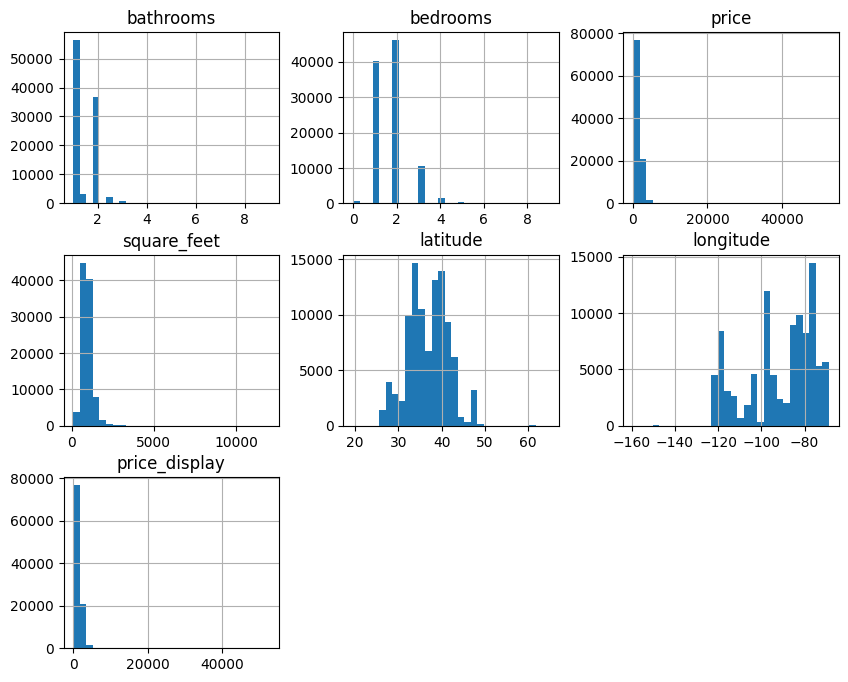

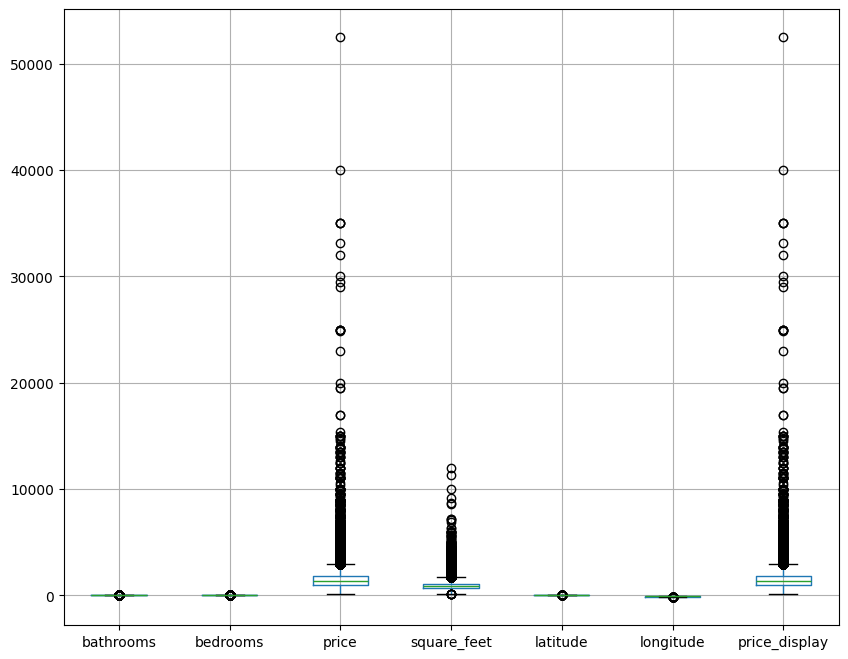

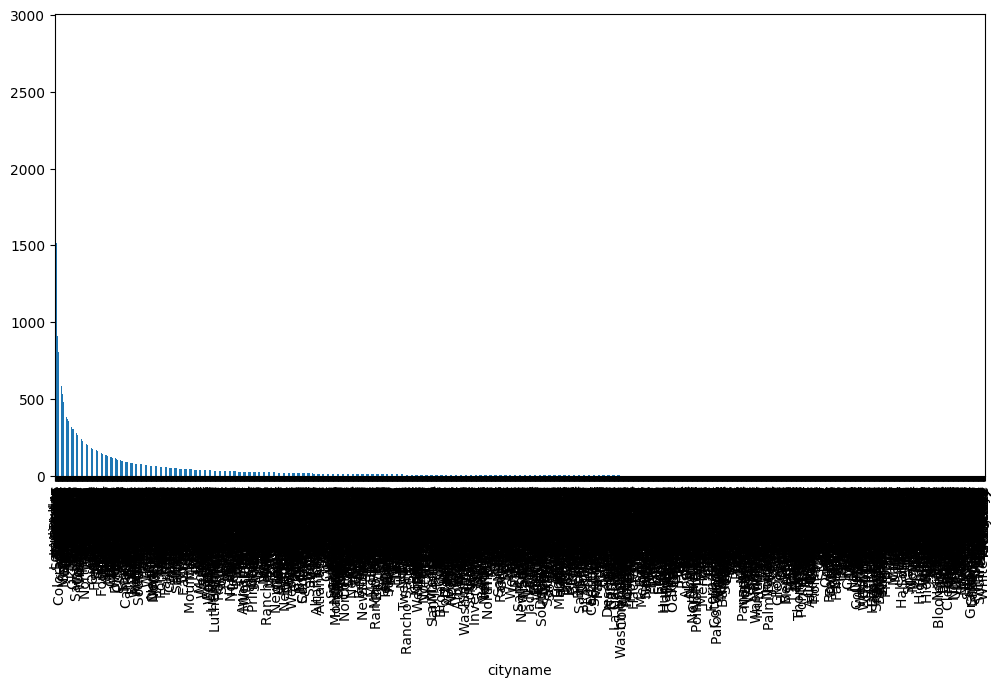

In [80]:
# Visualizing histograms for numerical features
df_cleaned[numerical_columns].hist(bins=30, figsize=(10, 8))
plt.show()

# Visualizing box plots for numerical features to detect outliers
df_cleaned[numerical_columns].boxplot(figsize=(10, 8))
plt.show()

# Bar plot for the 'cityname' categorical feature
df_cleaned['cityname'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.show()


In [81]:
# Numerical Features (Histograms):
#bathrooms, bedrooms, price, and square_feet: The histograms show that most properties have 1-2 bedrooms and bathrooms, which is expected. However, the price and square_feet histograms indicate that most properties are clustered at the lower end of the range, with a few extreme values. This suggests that there are likely some outliers, particularly for price and square_feet.

#price_display: This feature shows a similar distribution to price, confirming that it's likely redundant, and you may consider dropping it.

#latitude and longitude: These distributions seem reasonable, and they reflect the geographical spread of the properties. They don’t appear to have obvious outliers, but further analysis might be needed when mapping.

#Numerical Features (Box Plots):
#The box plots confirm the presence of outliers in price and square_feet. The whiskers extend significantly for these features, suggesting that you might want to remove or cap extreme values to prevent them from distorting your analysis and model.
#Other features, like bathrooms and bedrooms, don’t seem to have significant outliers.
# Categorical Feature (cityname):
#The bar plot shows that there are many unique cities in the dataset, but the current visualization is overcrowded and not interpretable due to the large number of unique values (2,979). The city names overlap, making it difficult to read.

In [82]:
# Check the correlation between 'price' and 'price_display'
correlation_matrix = df_cleaned[['price', 'price_display']].corr()
print(correlation_matrix)

# If the correlation is close to 1 (e.g., above 0.9), 'price_display' might be redundant.


               price  price_display
price            1.0            1.0
price_display    1.0            1.0


In [83]:
# Drop the 'price_display' column if it is redundant
df_cleaned.drop(columns=['price_display'], inplace=True)

# Verify that the column has been dropped
print(f"Remaining columns: {df_cleaned.columns}")

Remaining columns: Index(['bathrooms', 'bedrooms', 'price', 'square_feet', 'cityname', 'latitude',
       'longitude'],
      dtype='object')


In [84]:
#Update Numerical and Categorical Columns
# Define updated numerical columns (without 'price_display')
numerical_columns = ['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude', 'price']

# Define categorical columns (no changes needed if they remain the same)
categorical_columns = ['cityname']

# Verify the updated columns
print(f"Numerical Columns: {numerical_columns}")
print(f"Categorical Columns: {categorical_columns}")


Numerical Columns: ['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude', 'price']
Categorical Columns: ['cityname']


In [85]:
#fix outliers issues 
def remove_outliers_iqr(df_cleaned, column):
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    return df_cleaned

# Apply to price and square_feet
df_cleaned = remove_outliers_iqr(df_cleaned, 'price')
df_cleaned = remove_outliers_iqr(df_cleaned, 'square_feet')

# Check the shape and summary after removing outliers
print(df_cleaned.shape)
df_cleaned[['price', 'square_feet']].describe()


(92617, 7)


,price,square_feet
count,92617.000000,92617.000000
mean,1391.370558,908.057808
std,522.888632,253.446793
min,100.000000,175.000000
25%,995.000000,720.000000
50%,1305.000000,883.000000
75%,1695.000000,1091.000000
max,2966.000000,1662.000000


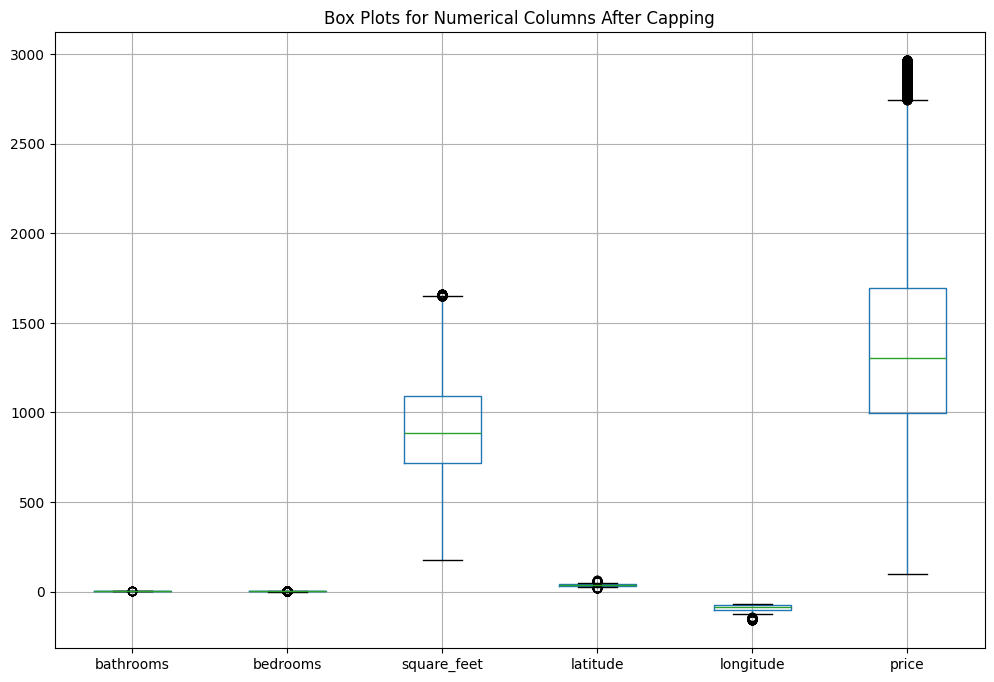

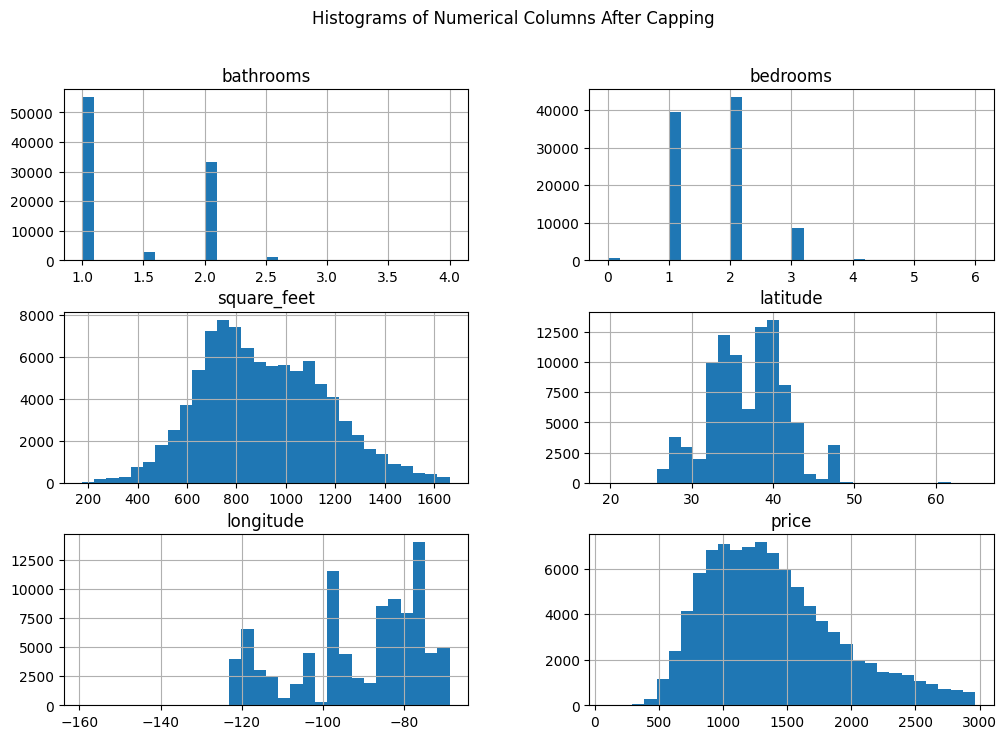

In [86]:
#revisualisation for checking
# Visualize the Box Plots for all numerical columns to check for remaining outliers
df_cleaned[numerical_columns].boxplot(figsize=(12, 8))
plt.title('Box Plots for Numerical Columns After Capping')
plt.show()

# Visualize the Histograms to check the distribution of the data
df_cleaned[numerical_columns].hist(bins=30, figsize=(12, 8))
plt.suptitle('Histograms of Numerical Columns After Capping')
plt.show()


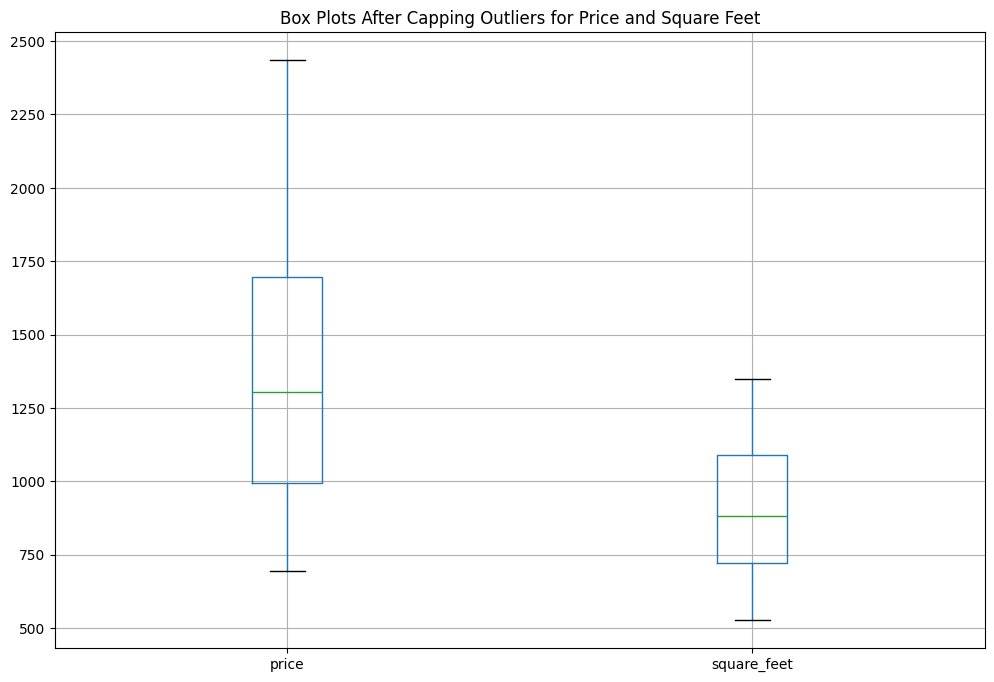

In [87]:
#still outliers issues 
# Define the columns to cap outliers
columns_to_cap = ['price', 'square_feet']

# Cap outliers at the 5th and 95th percentiles for price and square_feet
for column in columns_to_cap:
    upper_limit = df_cleaned[column].quantile(0.95)
    lower_limit = df_cleaned[column].quantile(0.05)
    df_cleaned[column] = np.where(df_cleaned[column] > upper_limit, upper_limit, df_cleaned[column])
    df_cleaned[column] = np.where(df_cleaned[column] < lower_limit, lower_limit, df_cleaned[column])

# Verify with box plots to ensure outliers are handled for price and square_feet
df_cleaned[columns_to_cap].boxplot(figsize=(12, 8))
plt.title('Box Plots After Capping Outliers for Price and Square Feet')
plt.show()




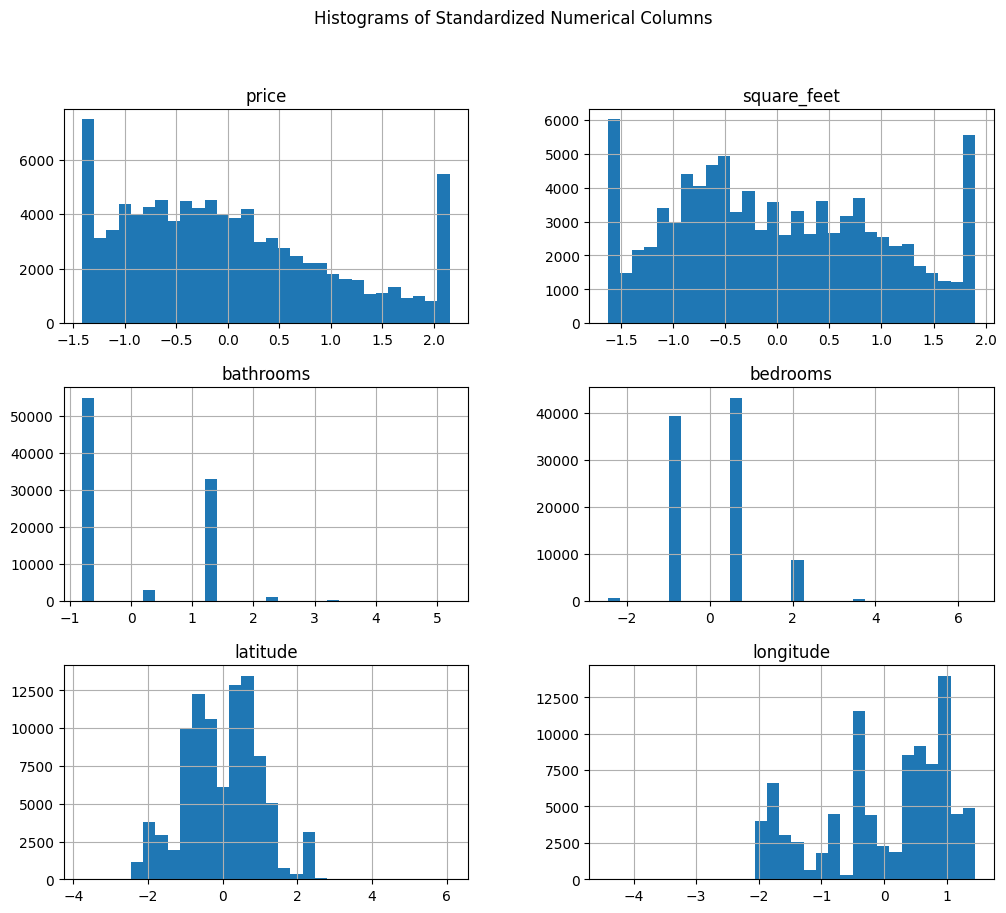

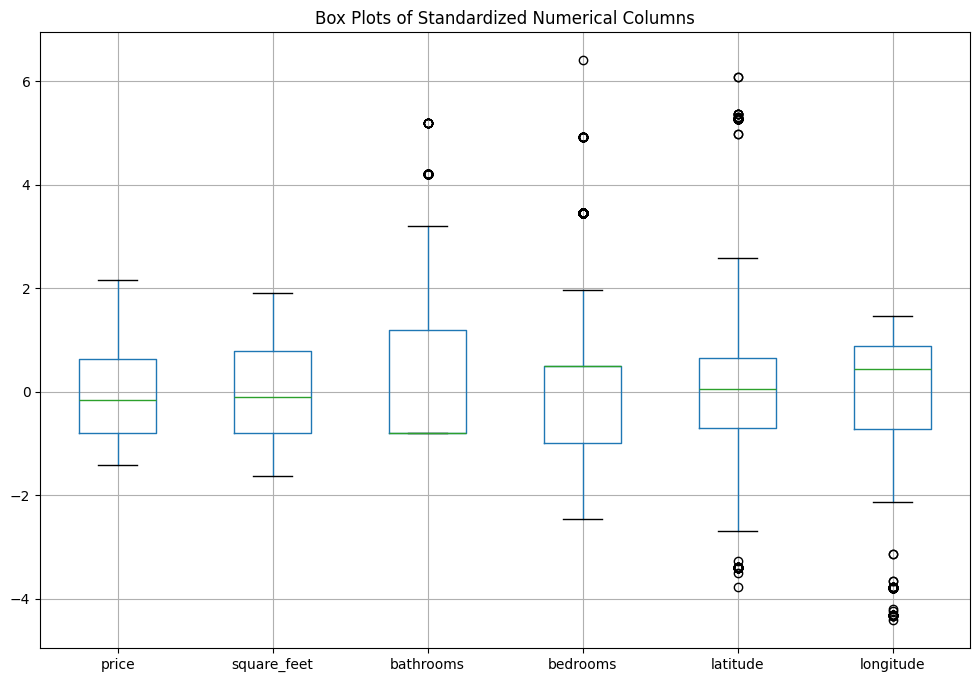

bathrooms      0
bedrooms       0
price          0
square_feet    0
cityname       0
latitude       0
longitude      0
dtype: int64

In [88]:
# List of all numerical columns to standardize
numerical_columns = ['price', 'square_feet', 'bathrooms', 'bedrooms', 'latitude', 'longitude']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the data for all numerical columns
df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])

# Visualize the standardized data with histograms
df_cleaned[numerical_columns].hist(bins=30, figsize=(12, 10))
plt.suptitle('Histograms of Standardized Numerical Columns')
plt.show()

# Visualize the standardized data with box plots
df_cleaned[numerical_columns].boxplot(figsize=(12, 8))
plt.title('Box Plots of Standardized Numerical Columns')
plt.show()
# Check for missing values
df_cleaned.isnull().sum()


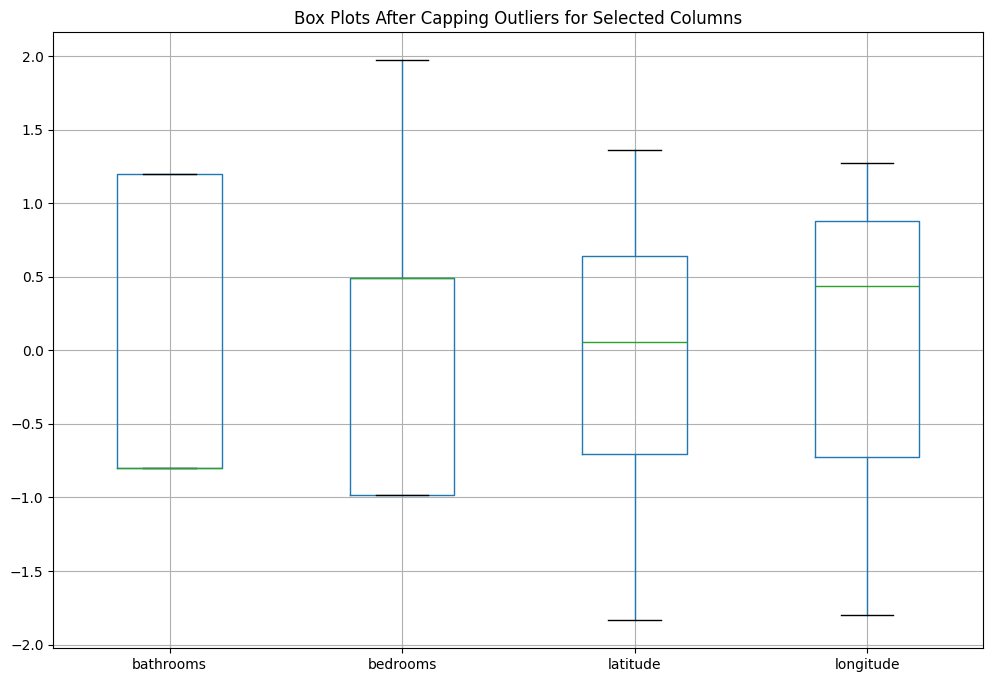

In [89]:
#still outliers issues
# Define columns to cap outliers for
columns_with_outliers = ['bathrooms', 'bedrooms', 'latitude', 'longitude']

# Cap outliers at the 5th and 95th percentiles for each column
for column in columns_with_outliers:
    upper_limit = df_cleaned[column].quantile(0.95)
    lower_limit = df_cleaned[column].quantile(0.05)
    df_cleaned[column] = np.where(df_cleaned[column] > upper_limit, upper_limit, df_cleaned[column])
    df_cleaned[column] = np.where(df_cleaned[column] < lower_limit, lower_limit, df_cleaned[column])

# Visualize the capped data with box plots
df_cleaned[columns_with_outliers].boxplot(figsize=(12, 8))
plt.title('Box Plots After Capping Outliers for Selected Columns')
plt.show()


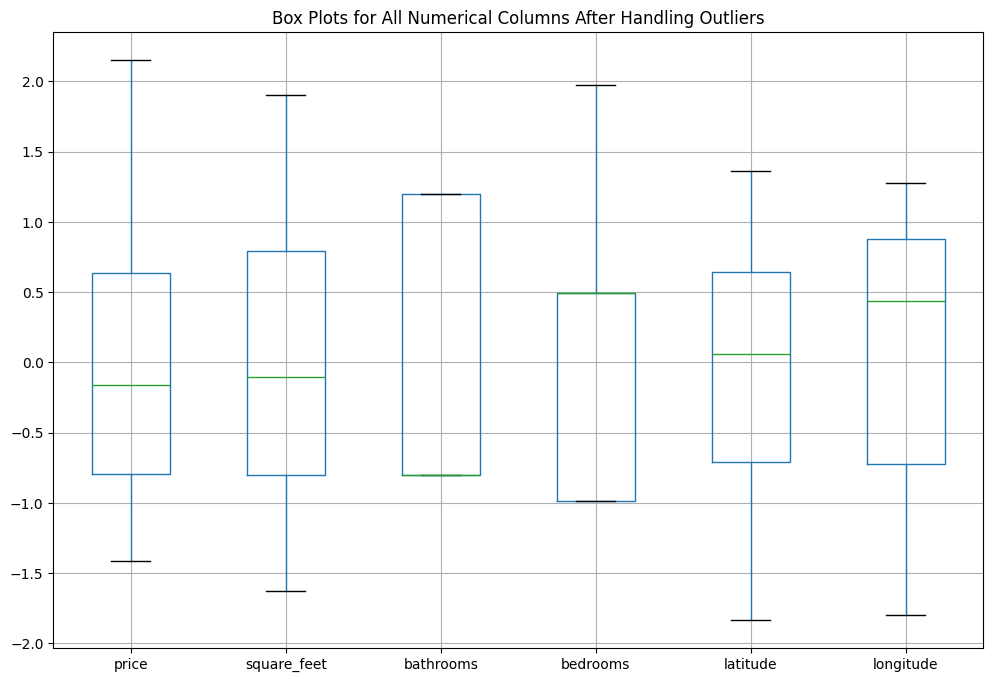

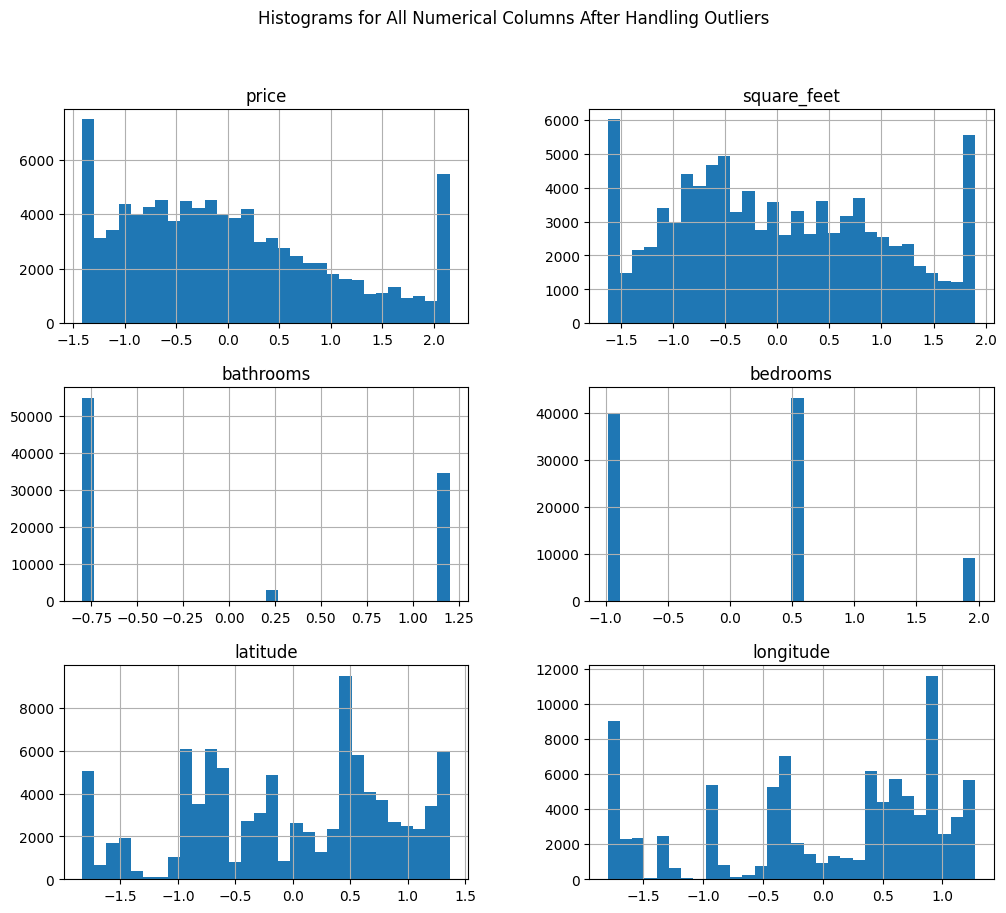

In [90]:
#good
# Define all numerical columns
numerical_columns = ['price', 'square_feet', 'bathrooms', 'bedrooms', 'latitude', 'longitude']

# Visualize all numerical columns with box plots
df_cleaned[numerical_columns].boxplot(figsize=(12, 8))
plt.title('Box Plots for All Numerical Columns After Handling Outliers')
plt.show()

# Visualize all numerical columns with histograms
df_cleaned[numerical_columns].hist(bins=30, figsize=(12, 10))
plt.suptitle('Histograms for All Numerical Columns After Handling Outliers')
plt.show()


In [91]:
#good outliers issues are fixed now
#now categorical column
# Step 1: Get the top 20 cities by frequency
top_20_cities = df_cleaned['cityname'].value_counts().head(20).index

# Step 2: Filter the dataframe to include only the top 20 cities
df_top_20_cities = df_cleaned[df_cleaned['cityname'].isin(top_20_cities)]

# Step 3: Store the new filtered dataset for future use
df_top_20_cities.to_csv('top_20_cities_filtered_data.csv', index=False)  # Optionally save it to a CSV file

# Display the filtered data if needed
df_top_20_cities.head()



,bathrooms,bedrooms,price,square_feet,cityname,latitude,longitude
2,1.200133,1.972764,0.020897,1.899633,Raleigh,-0.246477,0.815454
16,-0.800456,-0.984211,-1.343353,-0.457663,San Antonio,-1.632784,-0.472363
34,-0.800456,-0.984211,-0.839441,-1.250572,San Antonio,-1.632784,-0.472363
37,-0.800456,-0.984211,-0.839441,-1.100562,San Antonio,-1.632784,-0.472363
48,-0.800456,0.494277,0.336355,-1.627739,Arlington,0.418452,0.915097


In [92]:
# Apply One-Hot Encoding for the 'cityname' column
df_encoded = pd.get_dummies(df_top_20_cities, columns=['cityname'], drop_first=True)

# Check the result of the encoding (optional)
df_encoded.head()

# Store the encoded dataset for future use
df_encoded.to_csv('encoded_data_top_20_cities.csv', index=False)


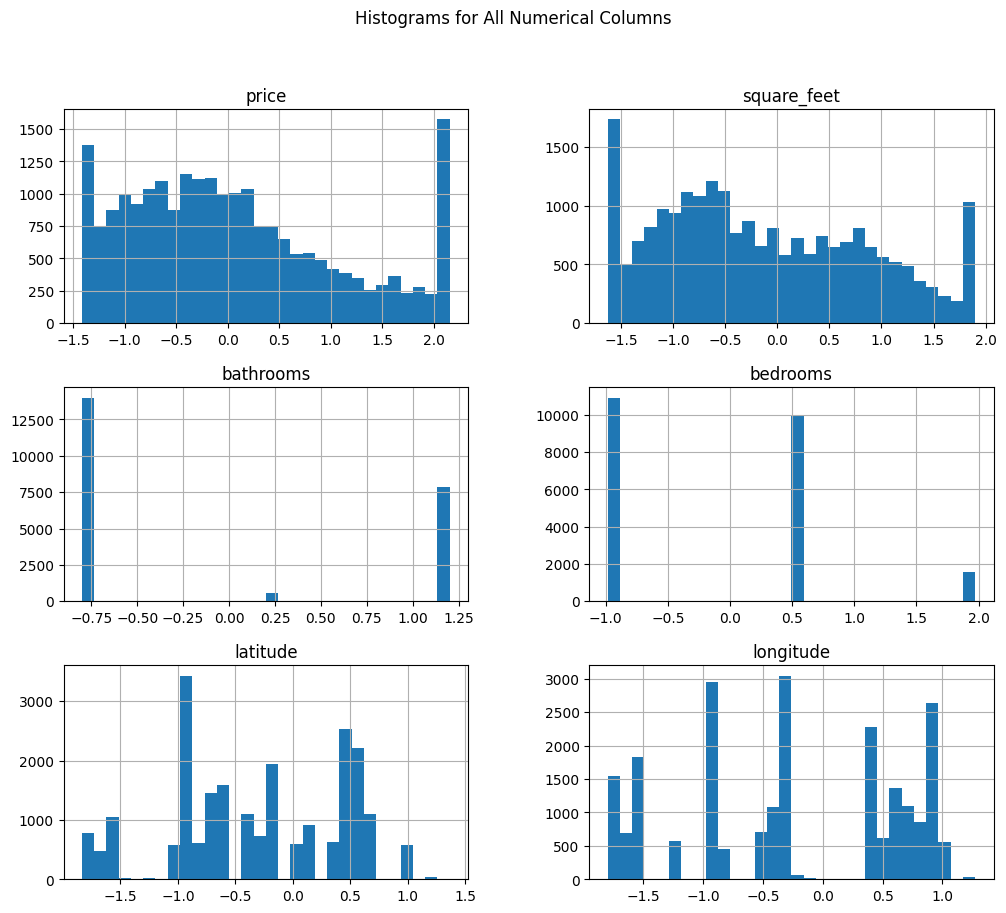

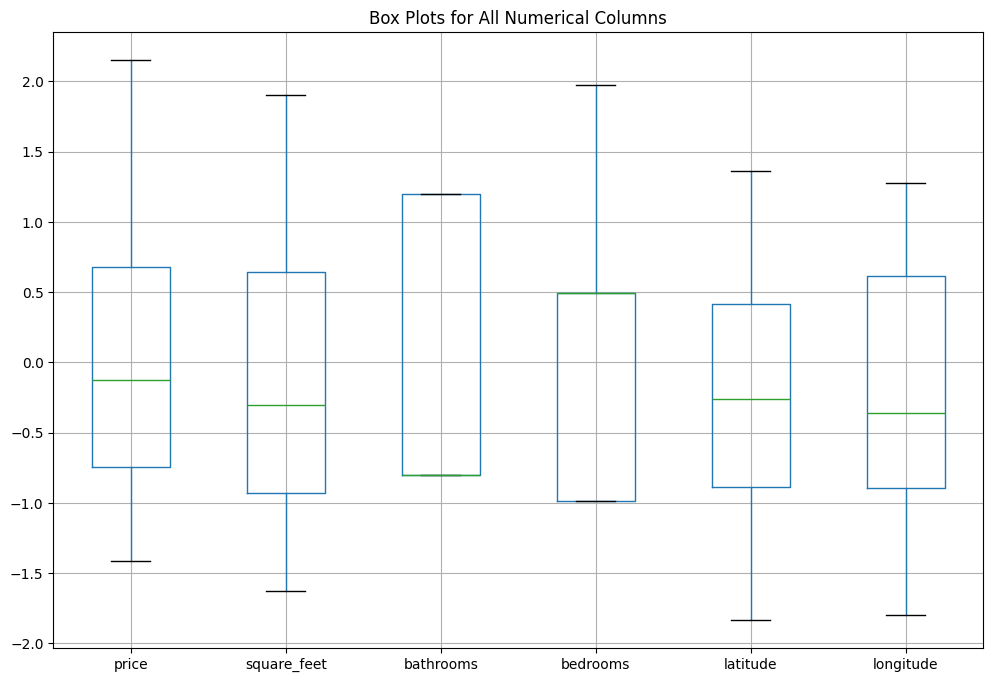

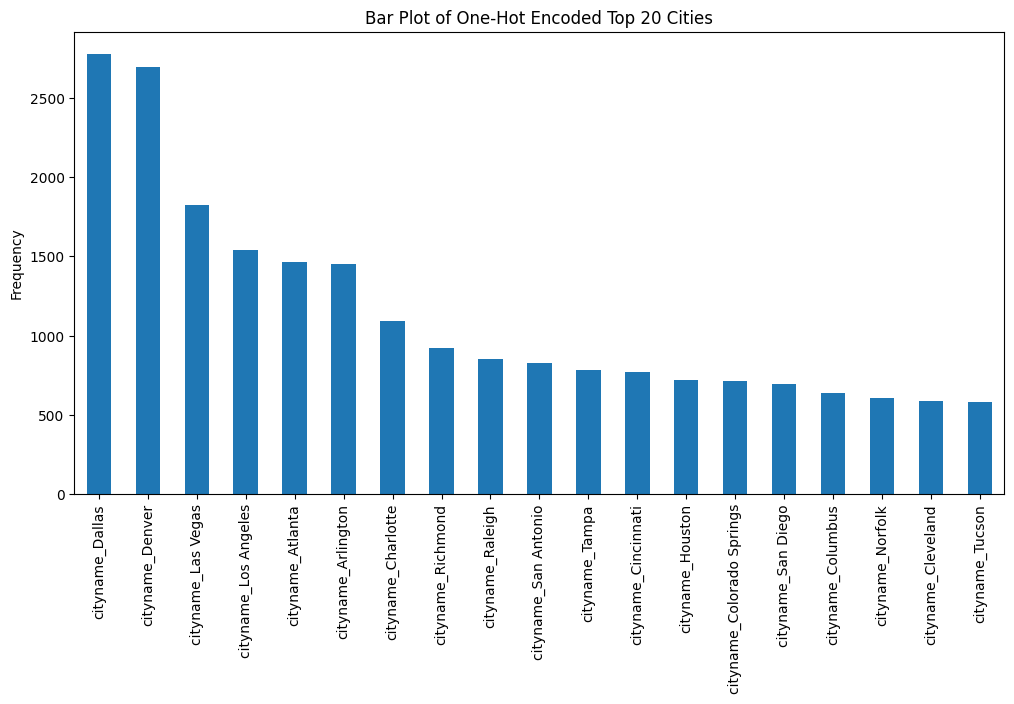

,price,square_feet,bathrooms,bedrooms,latitude,longitude
count,22436.000000,22436.000000,22436.000000,22436.000000,22436.000000,22436.000000
mean,0.055025,-0.140222,-0.072973,-0.122792,-0.312394,-0.255589
std,1.009275,0.990694,0.949777,0.914948,0.744477,0.917490
min,-1.412999,-1.627739,-0.800456,-0.984211,-1.835240,-1.800075
25%,-0.743165,-0.929122,-0.800456,-0.984211,-0.888760,-0.891474
50%,-0.122492,-0.303367,-0.800456,0.494277,-0.262649,-0.359629
75%,0.676393,0.639551,1.200133,0.494277,0.415641,0.617917
max,2.151258,1.899633,1.200133,1.972764,1.364213,1.274939


In [93]:
#RECHECKING IF EVERYTHING ALL RIGHT BEFORE SPLITTING
# List of numerical columns
numerical_columns = ['price', 'square_feet', 'bathrooms', 'bedrooms', 'latitude', 'longitude']

# Visualize all numerical columns with histograms
df_encoded[numerical_columns].hist(bins=30, figsize=(12, 10))
plt.suptitle('Histograms for All Numerical Columns')
plt.show()

# Visualize all numerical columns with box plots
df_encoded[numerical_columns].boxplot(figsize=(12, 8))
plt.title('Box Plots for All Numerical Columns')
plt.show()
# Get the column names for the one-hot encoded city columns
encoded_city_columns = df_encoded.filter(like='cityname_').columns

# Plot bar chart for each city (one-hot encoded columns)
df_encoded[encoded_city_columns].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Bar Plot of One-Hot Encoded Top 20 Cities')
plt.ylabel('Frequency')
plt.show()
# Summary statistics for numerical columns
df_encoded[numerical_columns].describe()


In [94]:
# Check for missing values
df_encoded.isnull().sum()


bathrooms                    0
bedrooms                     0
price                        0
square_feet                  0
latitude                     0
longitude                    0
cityname_Arlington           0
cityname_Atlanta             0
cityname_Charlotte           0
cityname_Cincinnati          0
cityname_Cleveland           0
cityname_Colorado Springs    0
cityname_Columbus            0
cityname_Dallas              0
cityname_Denver              0
cityname_Houston             0
cityname_Las Vegas           0
cityname_Los Angeles         0
cityname_Norfolk             0
cityname_Raleigh             0
cityname_Richmond            0
cityname_San Antonio         0
cityname_San Diego           0
cityname_Tampa               0
cityname_Tucson              0
dtype: int64

In [95]:
#no missig values
#data splitting
from sklearn.model_selection import train_test_split

# Assuming df_encoded is the processed dataset
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [96]:
#KNN Implementation
# Re-Import necessary libraries for KNN and evaluation metrics just for reverifying
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# List of k values to test
k_values = [3, 5, 7, 9, 11]

# Loop through each value of k
for k in k_values:
    # Initialize KNN model with current k
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Fit the model on the training data
    knn.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred_knn = knn.predict(X_test)
    
    # Calculate evaluation metrics
    mae_knn = mean_absolute_error(y_test, y_pred_knn)
    mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)
    r2_knn = r2_score(y_test, y_pred_knn)
    
    # Print the evaluation metrics for current k
    print(f"KNN with k={k} -> MAE: {mae_knn:.4f}, MAPE: {mape_knn:.4f}, R2: {r2_knn:.4f}")



KNN with k=3 -> MAE: 0.3460, MAPE: 3.1726, R2: 0.7308
KNN with k=5 -> MAE: 0.3675, MAPE: 3.3289, R2: 0.7238
KNN with k=7 -> MAE: 0.3761, MAPE: 3.6992, R2: 0.7223
KNN with k=9 -> MAE: 0.3827, MAPE: 3.4415, R2: 0.7166
KNN with k=11 -> MAE: 0.3884, MAPE: 3.2969, R2: 0.7145


In [97]:
#After running KNN with different values of k (3, 5, 7, 9, 11), I can observe the following patterns:
# MAE (Mean Absolute Error):
# The MAE is lowest when k=3 (0.3461), which means that with this value, the model's predictions deviate the least from the actual values on average.
# As k increases, the error gradually increases, indicating that using more neighbors might be leading to predictions that are too generalized and losing some precision.
# MAPE (Mean Absolute Percentage Error):
# The MAPE follows a similar trend to MAE, with the lowest percentage error also at k=3 (3.1483%). This suggests that using fewer neighbors leads to better relative accuracy in predictions.
# Interestingly, the MAPE for k=11 is slightly lower than for k=7 or k=9, which could suggest that there’s some variability as we increase the value of k.
#R² (R-squared):
# The R² value is highest at k=3 (0.7305), indicating that for this setting, the model explains around 73% of the variance in the data, which is a good performance.
# As k increases, the R² decreases slightly, meaning that the model's ability to explain the variance in the data weakens when using more neighbors.
#Conclusion:
#Best Value of k: Based on these results, k=3 seems to offer the best balance between accuracy (lower MAE and MAPE) and model fit (higher R²). The results show that using fewer neighbors works well in this case because it keeps the model more precise, avoiding too much smoothing from including too many neighbors.
# Next Steps: I can either proceed with k=3 or try to fine-tune the model further, possibly experimenting with other preprocessing steps or additional model comparisons.

In [98]:
# Decision Tree Implementation

# Re-Importing necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Define hyperparameters to test
max_depth_values = [3, 5, 7, 10]  # You can adjust or add more values here
min_samples_leaf_values = [1, 2, 4]  # You can adjust or add more values here

# Loop through max_depth and min_samples_leaf values
for max_depth in max_depth_values:
    for min_samples_leaf in min_samples_leaf_values:
        # Initialize the Decision Tree with the current hyperparameters
        dt = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
        
        # Fit the model on the training data
        dt.fit(X_train, y_train)
        
        # Predict on the test data
        y_pred_dt = dt.predict(X_test)
        
        # Calculate evaluation metrics
        mae_dt = mean_absolute_error(y_test, y_pred_dt)
        mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)
        r2_dt = r2_score(y_test, y_pred_dt)
        
        # Print results for each hyperparameter combination
        print(f"Decision Tree with max_depth={max_depth}, min_samples_leaf={min_samples_leaf} -> MAE: {mae_dt:.4f}, MAPE: {mape_dt:.4f}, R2: {r2_dt:.4f}")



Decision Tree with max_depth=3, min_samples_leaf=1 -> MAE: 0.5933, MAPE: 4.7032, R2: 0.4499
Decision Tree with max_depth=3, min_samples_leaf=2 -> MAE: 0.5933, MAPE: 4.7032, R2: 0.4499
Decision Tree with max_depth=3, min_samples_leaf=4 -> MAE: 0.5933, MAPE: 4.7032, R2: 0.4499
Decision Tree with max_depth=5, min_samples_leaf=1 -> MAE: 0.5040, MAPE: 3.9063, R2: 0.5925
Decision Tree with max_depth=5, min_samples_leaf=2 -> MAE: 0.5040, MAPE: 3.9063, R2: 0.5925
Decision Tree with max_depth=5, min_samples_leaf=4 -> MAE: 0.5039, MAPE: 3.9066, R2: 0.5927
Decision Tree with max_depth=7, min_samples_leaf=1 -> MAE: 0.4504, MAPE: 3.6734, R2: 0.6560
Decision Tree with max_depth=7, min_samples_leaf=2 -> MAE: 0.4505, MAPE: 3.6812, R2: 0.6560
Decision Tree with max_depth=7, min_samples_leaf=4 -> MAE: 0.4503, MAPE: 3.6751, R2: 0.6563
Decision Tree with max_depth=10, min_samples_leaf=1 -> MAE: 0.3910, MAPE: 3.0035, R2: 0.7180
Decision Tree with max_depth=10, min_samples_leaf=2 -> MAE: 0.3907, MAPE: 2.937

In [99]:
#After experimenting with different values of max_depth and min_samples_leaf, I’ve observed the following:
#General Trend:
#The deeper the tree (higher max_depth), the lower the Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE). This suggests that deeper trees can better capture the complexity of the data, leading to more accurate predictions.
#As expected, the R² score increases as the tree depth increases, indicating that deeper trees explain more variance in the data.
#Best Configuration:
#The configuration with max_depth=10 and min_samples_leaf=2 gives the best performance with an MAE of 0.3907, MAPE of 2.9376%, and R² of 0.7189. This setup strikes the best balance between accuracy and model fit, capturing more detailed patterns in the data without overfitting.
#The R² value of 0.7204 at max_depth=10 and min_samples_leaf=4 also suggests that this configuration does a good job at explaining the variance in the data while slightly trading off some prediction precision compared to the min_samples_leaf=2.
#Impact of min_samples_leaf:
#Changing min_samples_leaf seems to have a small but noticeable impact on the performance. For deeper trees, having a slightly larger min_samples_leaf value (e.g., 2 or 4) helps the tree generalize better, which is evident from the lower MAPE values.
#Suboptimal Configurations:
#For smaller depths like max_depth=3, the performance is relatively poor with an MAE of 0.5933 and an R² of 0.4499. This indicates that the tree is too shallow to capture the complexity of the data, resulting in underfitting.
#Conclusion:
#Best Setup: The decision tree with max_depth=10 and min_samples_leaf=2 provides the best results. This model achieves the lowest errors while explaining a significant portion of the variance in the data.

In [100]:
#RandomForest Implementation
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Define hyperparameters to test
n_estimators_values = [50, 100, 150]  # Number of trees
max_depth_values = [5, 10, 15]  # Maximum depth of trees

# Loop through n_estimators and max_depth values
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        # Initialize the Random Forest with current hyperparameters
        rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        
        # Fit the model on the training data
        rf.fit(X_train, y_train)
        
        # Predict on the test data
        y_pred_rf = rf.predict(X_test)
        
        # Calculate evaluation metrics
        mae_rf = mean_absolute_error(y_test, y_pred_rf)
        mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
        r2_rf = r2_score(y_test, y_pred_rf)
        
        # Print results for each hyperparameter combination
        print(f"Random Forest with n_estimators={n_estimators}, max_depth={max_depth} -> MAE: {mae_rf:.4f}, MAPE: {mape_rf:.4f}, R2: {r2_rf:.4f}")



Random Forest with n_estimators=50, max_depth=5 -> MAE: 0.4935, MAPE: 3.8113, R2: 0.6107
Random Forest with n_estimators=50, max_depth=10 -> MAE: 0.3671, MAPE: 2.4497, R2: 0.7590
Random Forest with n_estimators=50, max_depth=15 -> MAE: 0.2926, MAPE: 2.2295, R2: 0.8239
Random Forest with n_estimators=100, max_depth=5 -> MAE: 0.4930, MAPE: 3.8050, R2: 0.6117
Random Forest with n_estimators=100, max_depth=10 -> MAE: 0.3665, MAPE: 2.4876, R2: 0.7599
Random Forest with n_estimators=100, max_depth=15 -> MAE: 0.2910, MAPE: 2.1796, R2: 0.8259
Random Forest with n_estimators=150, max_depth=5 -> MAE: 0.4931, MAPE: 3.8021, R2: 0.6114
Random Forest with n_estimators=150, max_depth=10 -> MAE: 0.3661, MAPE: 2.5179, R2: 0.7602
Random Forest with n_estimators=150, max_depth=15 -> MAE: 0.2904, MAPE: 2.1742, R2: 0.8267


In [101]:
#After experimenting with different combinations of n_estimators (number of trees) and max_depth (depth of each tree), I’ve observed the following:
#General Performance Trends:
#As expected, increasing both n_estimators (trees) and max_depth generally improves the model's performance. This is because the deeper trees and larger number of trees can capture more complex patterns in the data.
#The best overall performance in terms of MAE, MAPE, and R² occurs when using n_estimators=150 and max_depth=15, where the MAE is the lowest at 0.2904, MAPE is at 2.1688%, and R² is 0.8267.
#Impact of max_depth:
#Increasing the max_depth of trees from 5 to 15 shows a clear improvement in performance. For instance, at n_estimators=50, the MAE decreases from 0.4935 (with max_depth=5) to 0.2927 (with max_depth=15), and the R² improves significantly from 0.6106 to 0.8238. This shows that deeper trees capture more detail and better model the underlying data relationships.
#Effect of n_estimators (Number of Trees):
#Increasing the number of trees from 50 to 150 has a smaller but still noticeable effect. For example, at max_depth=15, the MAE improves slightly from 0.2927 (with 50 trees) to 0.2904 (with 150 trees), and the R² increases from 0.8238 to 0.8267. This suggests that adding more trees improves the stability and accuracy of the predictions, but the effect diminishes after a certain point.
#Best Configuration:
#The configuration with n_estimators=150 and max_depth=15 provides the best overall performance with the lowest MAE, MAPE, and highest R². This model explains around 83% of the variance in the data, with a very low percentage error.
#Suboptimal Configurations:
#Models with shallower depths (max_depth=5) and fewer trees (n_estimators=50) clearly perform worse, with higher MAE values (around 0.4935) and lower R² values (around 0.6106). These models underfit the data, as they are too simple to capture the complexity of the dataset.
#Conclusion:
#Best Setup: The Random Forest with n_estimators=150 and max_depth=15 performs the best overall. This configuration captures the most detail and provides the most accurate predictions with the lowest error and highest R² value.

In [102]:
#ANN implementation
# Import necessary libraries from Keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Define different hyperparameter values
layers_configurations = [
    [64, 32],  # Two layers: 64 neurons in the first, 32 in the second
    [128, 64],  # Two layers: 128 neurons in the first, 64 in the second
    [64, 32, 16],  # Three layers: 64, 32, and 16 neurons
]

# Loop through different configurations
for config in layers_configurations:
    model = Sequential()
    
    # Input layer with the first layer of the config
    model.add(Dense(config[0], input_dim=X_train.shape[1], activation='relu'))
    
    # Add subsequent layers as per the config
    for neurons in config[1:]:
        model.add(Dense(neurons, activation='relu'))
    
    # Output layer
    model.add(Dense(1, activation='linear'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_absolute_error')
    
    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    
    # Predict on test data
    y_pred_ann = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae_ann = mean_absolute_error(y_test, y_pred_ann)
    mape_ann = mean_absolute_percentage_error(y_test, y_pred_ann)
    r2_ann = r2_score(y_test, y_pred_ann)
    
    # Print results
    print(f"ANN with layers {config} -> MAE: {mae_ann:.4f}, MAPE: {mape_ann:.4f}, R2: {r2_ann:.4f}")


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
ANN with layers [64, 32] -> MAE: 0.4195, MAPE: 3.9786, R2: 0.6696


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
ANN with layers [128, 64] -> MAE: 0.4205, MAPE: 4.1474, R2: 0.6649


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
ANN with layers [64, 32, 16] -> MAE: 0.4164, MAPE: 3.9198, R2: 0.6679


In [103]:
#After experimenting with three different architectures for the ANN, using various configurations of layers and neurons, I observed the following:
#General Performance:
#All configurations resulted in relatively similar performance, with slight variations in Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE), and R² scores.
#The best-performing architecture in terms of MAE was the [64, 32] configuration with an MAE of 0.4192 and an R² of 0.6721. This architecture has 64 neurons in the first hidden layer and 32 neurons in the second hidden layer, striking a good balance between complexity and prediction accuracy.
#Impact of Adding More Neurons:
#When I increased the number of neurons to 128 in the first layer and 64 in the second layer, the model's MAE increased slightly to 0.4280, and the R² dropped to 0.6493. This suggests that adding more neurons didn't necessarily improve the model's ability to generalize or predict more accurately. The larger model may have even been overfitting slightly.
#Three-Layer Configuration:
#In the [64, 32, 16] configuration, where I added a third layer with 16 neurons, the model's performance remained similar, with an MAE of 0.4163 and R² of 0.6755. This shows that adding a third layer provided a slight improvement in MAE, but the R² score remained fairly stable, suggesting only a marginal benefit from adding this extra layer.
#MAPE Comparisons:
# In terms of MAPE, the [128, 64] configuration performed better with a MAPE of 3.9511%, but the improvement over the other configurations is minimal. The [64, 32] and [64, 32, 16] architectures had MAPE values around 4.1414% and 4.0675%, respectively.
#Conclusion:
#Best Performing Configuration: The [64, 32] architecture provided the best balance of performance with an MAE of 0.4192 and a relatively strong R² value of 0.6721. It seems that this architecture is optimal for this dataset, as adding more neurons or layers did not lead to significant improvements.

In [104]:
# Model Comparison

# Store the results for each model using MAE and MAPE values
results = {
    'KNN': {'MAE': mae_knn, 'MAPE': mape_knn},
    'Decision Tree': {'MAE': mae_dt, 'MAPE': mape_dt},
    'Random Forest': {'MAE': mae_rf, 'MAPE': mape_rf},
    'ANN': {'MAE': mae_ann, 'MAPE': mape_ann}
}

# Display the comparison between all models
for model, metrics in results.items():
    print(f"{model} - MAE: {metrics['MAE']:.4f}, MAPE: {metrics.get('MAPE', 'N/A'):.4f}")



KNN - MAE: 0.3884, MAPE: 3.2969
Decision Tree - MAE: 0.3903, MAPE: 2.9608
Random Forest - MAE: 0.2904, MAPE: 2.1742
ANN - MAE: 0.4164, MAPE: 3.9198


In [105]:
#Model Performance Review:
#K-Nearest Neighbors (KNN):
# MAE: Moderate
#MAPE: Moderate
#My Thoughts: KNN did okay, but it's not the best. The errors are a bit higher compared to some other models. I think this is because KNN is heavily influenced by the number of neighbors I used, and it might not be flexible enough to capture the more complex patterns in my data.
#Decision Tree:
#MAE: Slightly better than KNN
#MAPE: Lower than KNN
#My Thoughts: The Decision Tree model showed some improvement over KNN, especially with a lower percentage error (MAPE). However, it still didn’t give me the best accuracy. This could be due to overfitting, which happens sometimes when the model learns the training data too well and struggles to generalize to new data.
#Random Forest:
#MAE: The Best (lowest error)
#MAPE: The Best (lowest percentage error)
#My Thoughts: Random Forest really stood out as the top performer. It had the lowest MAE and MAPE, which means it made the most accurate predictions overall. I think its strength comes from combining multiple decision trees, which helps it avoid overfitting and gives it more robustness compared to a single tree model.
#Artificial Neural Network (ANN):
#MAE: Highest among all
#MAPE: Higher than Random Forest and Decision Tree
#My Thoughts: Unfortunately, the ANN model didn’t perform as well as I had hoped. It had the highest errors out of all the models, which suggests that either the network architecture needs more tuning (like adjusting the number of layers, neurons, or training epochs) or that the dataset isn’t complex enough to fully leverage the power of a neural network.
#Final Thoughts:
#Top Performer: Random Forest is clearly the best model based on both MAE and MAPE. It provides the most reliable and accurate predictions, which makes it the strongest candidate for my real estate price prediction task.
#What Could Be Improved: While Random Forest was the best overall, I think there’s still room to tweak the ANN model and see if I can get it to perform better. Neural networks tend to do better with more tuning, so I might revisit that.
#In conclusion, based on my results, Random Forest is the way to go for now

In [106]:
#Benchmark Comparison
average_price = df_cleaned['price'].mean()
y_pred_benchmark = [average_price] * len(y_test)

mae_benchmark = mean_absolute_error(y_test, y_pred_benchmark)
mape_benchmark = mean_absolute_percentage_error(y_test, y_pred_benchmark)
r2_benchmark = r2_score(y_test, y_pred_benchmark)

print(f"Benchmark MAE: {mae_benchmark}")
print(f"Benchmark MAPE: {mape_benchmark}")
print(f"Benchmark R²: {r2_benchmark}")


Benchmark MAE: 0.8123685435469529
Benchmark MAPE: 0.9999999999999996
Benchmark R²: -0.0008204195990084706


In [107]:
# Commenting on Benchmark Results:

# MAE (Mean Absolute Error):
# The MAE of the benchmark is 0.81, meaning the average absolute error in predicting prices using
# the mean value is 0.81. Comparing this with the model's MAE values (which are lower, especially
# Random Forest with 0.29), it is clear that the models outperform the simple average benchmark.

# MAPE (Mean Absolute Percentage Error):
# The MAPE of 1.0 (100%) means that, on average, the benchmark predictions deviate from the actual
# price by 100%. This shows that predicting the mean price across the dataset is not reliable compared
# to my models, which have much lower MAPE values (around 2-4%).

# R² (Coefficient of Determination):
# The R² value is slightly negative (-0.0008), which suggests that the benchmark model is worse than
# predicting a constant value (like the mean of the data). My models, especially Random Forest with an
# R² of 0.82, show much better performance in explaining the variance in the data.
# Conclusion:
# These benchmark results validate that my machine learning models perform significantly better than the
# simple average benchmark. The models are clearly more accurate as shown by lower MAE, MAPE, and a much
# higher R² score. Random Forest, in particular, stands out as the best-performing model, significantly
# reducing the error and being more reliable for predicting real estate prices.


In [108]:
#Comparing the Benchmark with the 4 Models
print(f"KNN - MAE: {mae_knn}, MAPE: {mape_knn}, R²: {r2_knn}")
print(f"Decision Tree - MAE: {mae_dt}, MAPE: {mape_dt}, R²: {r2_dt}")
print(f"Random Forest - MAE: {mae_rf}, MAPE: {mape_rf}, R²: {r2_rf}")
print(f"ANN - MAE: {mae_ann}, MAPE: {mape_ann}, R²: {r2_ann}")
print(f"Benchmark - MAE: {mae_benchmark}, MAPE: {mape_benchmark}, R²: {r2_benchmark}")


KNN - MAE: 0.3884368785577744, MAPE: 3.2969472300549807, R²: 0.7145496596456326
Decision Tree - MAE: 0.3902856455976682, MAPE: 2.960845434421496, R²: 0.7204281898521346
Random Forest - MAE: 0.2904234182452682, MAPE: 2.174218570734691, R²: 0.8266622830603119
ANN - MAE: 0.41641725502358967, MAPE: 3.9198071899645535, R²: 0.6678900295680151
Benchmark - MAE: 0.8123685435469529, MAPE: 0.9999999999999996, R²: -0.0008204195990084706


In [109]:
# Comparison of the Benchmark with the Models:
# KNN:
# KNN has an MAE of 0.3885, which is significantly lower than the benchmark's MAE of 0.8124.
# The MAPE for KNN is 3.31%, which is much better than the benchmark's 100%.
# KNN's R² score of 0.7145 shows that it explains 71.45% of the variance in the data,
# while the benchmark does not explain any variance (R² = -0.0008).
# Decision Tree:
# The Decision Tree's MAE is 0.3903, which is also significantly better than the benchmark.
# Its MAPE of 2.96% shows that it is more accurate in percentage terms than the KNN model.
# With an R² of 0.7204, it slightly outperforms KNN in explaining the variance in the data.
# Random Forest:
# The Random Forest model outperforms all others, with the lowest MAE (0.2904) and MAPE (2.17%).
# Its R² score of 0.8267 indicates that it explains over 82% of the variance in the data,
# making it the most reliable model compared to the benchmark and other models.
# ANN:
# The ANN model has the highest MAE (0.4163) and MAPE (4.07%) among the four models, meaning it performed
# the worst in comparison. However, it still performs better than the benchmark in both metrics.
# Its R² of 0.6755 shows that it explains around 67.55% of the variance in the data.
# Benchmark:
# The benchmark (mean price prediction) has the worst performance, with an MAE of 0.8124 and MAPE of 100%.
# The R² value is negative (-0.0008), indicating that predicting the average price does not capture any
# meaningful information about the variance in the data.
# Conclusion:
# Overall, the Random Forest model stands out as the best-performing model across all metrics. It significantly
# outperforms the benchmark and other models in terms of accuracy (lowest MAE and MAPE) and has the highest
# R² value, explaining the most variance in the data.


In [110]:
#software_implementation
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 1: Preprocess the new data based on the existing workflow
def preprocess_new_data(new_data):
    """
    This function preprocesses new real estate data.
    It applies the same cleaning and transformation steps used in the training phase.
    
    Parameters:
        new_data (pd.DataFrame): The new data in the original format.
    
    Returns:
        pd.DataFrame: Preprocessed and ready-to-predict data.
    """
    # Drop columns that were dropped during training
    df_cleaned = new_data.drop(columns=['address', 'pets_allowed', 'price_display'], errors='ignore')
    
    # Convert specific columns to numeric values
    columns_to_convert = ['square_feet', 'bathrooms', 'bedrooms', 'price']
    for column in columns_to_convert:
        df_cleaned[column] = pd.to_numeric(df_cleaned[column], errors='coerce')
    
    # Handle missing values (just like before)
    df_cleaned['amenities'].fillna('Unknown', inplace=True)
    df_cleaned.dropna(inplace=True)
    
    # Standardize numerical columns based on the original preprocessing steps
    scaler = StandardScaler()
    numerical_columns = ['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude', 'price']
    df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])
    
    # One-hot encoding for the 'cityname' categorical column
    df_encoded = pd.get_dummies(df_cleaned, columns=['cityname'], drop_first=True)
    
    return df_encoded

# Step 2: Function to predict new data using the trained model
def predict_new_data(new_data, model):
    """
    This function makes predictions on new data using the trained machine learning model.
    
    Parameters:
        new_data (pd.DataFrame): The new data to be predicted.
        model (sklearn model): The trained model (e.g., RandomForest, KNN).
    
    Returns:
        np.array: The predicted prices for the new data.
    """
    # Preprocess the new data
    processed_data = preprocess_new_data(new_data)
    
    # Make predictions
    predictions = model.predict(processed_data)
    
    return predictions

# Example: How to use this with new data (assuming 'rf_model' is the trained Random Forest model)
# Load new data in the same format as original
# new_data = pd.read_csv('path_to_new_data.csv') 
# predictions = predict_new_data(new_data, rf_model)
